In [3]:
%run main.ipynb

Null counts for 2019:
Program              0
Service              0
Activity             0
Expense/Revenue      0
Category Name        0
Sub-Category Name    0
Commitment item      0
2019                 0
dtype: int64

Null counts for 2020:
Program              0
Service              0
Activity             0
Expense/Revenue      0
Category Name        0
Sub-Category Name    0
Commitment item      0
2020                 0
dtype: int64

Null counts for 2021:
Program              0
Service              0
Activity             0
Expense/Revenue      0
Category Name        0
Sub-Category Name    0
Commitment item      0
2021                 0
dtype: int64

Null counts for 2022:
Program              0
Service              0
Activity             0
Expense/Revenue      0
Category Name        0
Sub-Category Name    0
Commitment item      0
2022                 0
dtype: int64

Null counts for 2023:
Program              0
Service              0
Activity             0
Expense/Revenue      0
Catego

In [4]:
#Renaming the last column in each dataset to 'Budgeted Amount'
new_df = [] #Empty list to store the renamed dataframe
for i, df in enumerate(df_list):
    year = 2019 + i 
    old_column_name = f'Budgeted amount {year}' #Old column name
    modified_df = df.copy() #Create a copy of the DataFrame and rename the column
    modified_df.rename(columns={old_column_name: 'Budgeted amount'}, inplace=True)
    new_df.append(modified_df)  # Append the modified DataFrame to new_df

# Concatenate the DataFrames in the list into a single DataFrame
renamed_df = pd.concat(new_df, ignore_index=True)
renamed_df.loc[:,'Budgeted amount'] = pd.to_numeric(modified_df['Budgeted amount'], errors='coerce') #Changing data to numeric for calculations

In [5]:
renamed_expenses = renamed_df[renamed_df['Expense/Revenue']=='Expenses'] #Filtering dataframe for expenses
renamed_expenses

,Program,Service,Activity,Expense/Revenue,Category Name,Sub-Category Name,Commitment item,Budgeted amount
0,Affordable Housing Office,Housing Improvement Programs,Housing Improvement Programs,Expenses,Salaries And Benefits,Allowances,Benefits To Be Dist,63293.40
1,Affordable Housing Office,Housing Improvement Programs,Housing Improvement Programs,Expenses,Salaries And Benefits,Benefits,Comprehensive Med,2830.00
2,Affordable Housing Office,Housing Improvement Programs,Housing Improvement Programs,Expenses,Salaries And Benefits,Benefits,CPP,72595.32
3,Affordable Housing Office,Housing Improvement Programs,Housing Improvement Programs,Expenses,Salaries And Benefits,Benefits,Dental Plan,37800.96
4,Affordable Housing Office,Housing Improvement Programs,Housing Improvement Programs,Expenses,Salaries And Benefits,Benefits,EI,22992.96
...,...,...,...,...,...,...,...,...
97855,Yonge-Dundas Square,Public Square And Event Venue,Not assigned,Expenses,Service And Rent,Professtional & Consulting,Professional Services - Audit,NaN
97856,Yonge-Dundas Square,Public Square And Event Venue,Not assigned,Expenses,Service And Rent,Professtional & Consulting,Professional Services - Legal,NaN
97857,Yonge-Dundas Square,Public Square And Event Venue,Not assigned,Expenses,Service And Rent,Rentals,Rental Of Office,NaN
97858,Yonge-Dundas Square,Public Square And Event Venue,Not assigned,Expenses,Service And Rent,Telecommnuncation,Telephone,NaN


In [6]:
#Outliers for expenses
all_outliers_exp = pd.DataFrame() #Creating an empty dataframe to store the outliers
lower_quartiles_exp = renamed_expenses.groupby('Category Name')['Budgeted amount'].transform(lambda x: x.quantile(0.25)) #Calculating the lower quantile
upper_quartiles_exp = renamed_expenses.groupby('Category Name')['Budgeted amount'].transform(lambda x: x.quantile(0.75)) #Calculating the upper quantile
iqr_exp = upper_quartiles_exp - lower_quartiles_exp #Calculating the interquantile range
lower_bound_exp = lower_quartiles_exp - 1.5 * iqr_exp #Calculating the lower bound by using the values from the lower quantiles to find the minimum threshold
upper_bound_exp = upper_quartiles_exp + 1.5 * iqr_exp  #Calculating the lower bound by using the values from the lower quantiles to find the minimum threshold
outliers_exp = renamed_expenses[(renamed_expenses['Budgeted amount'] < lower_bound_exp) | (renamed_expenses['Budgeted amount'] > upper_bound_exp)] #Identifing and filtering outliers in the 'Budgeted amount' column based on the calculated lower and upper bounds for expenses.
all_outliers_exp = pd.concat([all_outliers_exp, outliers_exp], ignore_index=True) #Combining identified outliers from each dataframe and create a final dataframe
# Display the result
all_outliers_exp.sort_values('Budgeted amount', ascending=False)

,Program,Service,Activity,Expense/Revenue,Category Name,Sub-Category Name,Commitment item,Budgeted amount
3257,Solid Waste Management Services,Solid Waste Collection & Transfer,Garbage (C&T),Expenses,Inter-Divisional Charges,Inter-Divisional Charges,IDC-PPF&A,1.189747e+09
63,Children's Services,Child Care Delivery,Child Care Delivery,Expenses,Materials & Supplies,Office Supplies,Other Office Materl,8.332464e+08
116,Children's Services,Child Care System Management,Child Care System Management,Expenses,Service And Rent,Business Travel,Bustrav - Gr. Trans,6.533698e+08
3256,Solid Waste Management Services,Solid Waste Collection & Transfer,Garbage (C&T),Expenses,Inter-Divisional Charges,Inter-Divisional Charges,IDC-Postage & Courie,4.181078e+08
2824,Toronto Public Health,Family Health,Family Health,Expenses,Salaries And Benefits,Benefits,Dental Plan,3.974884e+08
...,...,...,...,...,...,...,...,...
3701,Toronto Water,Water Treatment & Supply,Water Distribution,Expenses,Materials & Supplies,Materials,Rec & Educt'n Suppls,-3.587871e+08
2894,Toronto Public Health,Infectious Diseases,Infectious Diseases,Expenses,Service And Rent,Contracted Services,Comp Software Main,-9.229487e+08
1242,City Planning,City Building & Policy Development,City Building & Policy Development,Expenses,Inter-Divisional Charges,Inter-Divisional Charges,IDC-Postage & Courie,-9.440205e+08
3264,Solid Waste Management Services,Solid Waste Collection & Transfer,Green Bin (C&T),Expenses,Salaries And Benefits,Benefits,Comprehensive Med,-1.004444e+09


In [7]:
renamed_revenues = renamed_df[renamed_df['Expense/Revenue']=='Revenues'] #Filtering dataframe for revenues
renamed_revenues

,Program,Service,Activity,Expense/Revenue,Category Name,Sub-Category Name,Commitment item,Budgeted amount
58,Affordable Housing Office,Housing Improvement Programs,Housing Improvement Programs,Revenues,Provincial Subsidies,Provincial Subsidies,Prov Grants/Subs,267804.40
59,Affordable Housing Office,Housing Improvement Programs,Housing Improvement Programs,Revenues,Contribution From Reserves/Reserve Funds,Contribution From Reserves/Reserve Funds,Cont From Res Fund,166126.40
118,Affordable Housing Office,Housing Policy & Partnerships,Housing Policy & Partnerships,Revenues,Provincial Subsidies,Provincial Subsidies,Prov Grants/Subs,1029437.00
119,Affordable Housing Office,Housing Policy & Partnerships,Housing Policy & Partnerships,Revenues,Contribution From Reserves/Reserve Funds,Contribution From Reserves/Reserve Funds,Cont From Res Fund,31000.00
178,Affordable Housing Office,New Affordable Housing Development,New Affordable Housing Development,Revenues,Provincial Subsidies,Provincial Subsidies,Prov Grants/Subs,2183.29
...,...,...,...,...,...,...,...,...
97840,Transportation Services,Transportation Safety & Operations,Transportation Studies & Investigations,Revenues,Transfers From Capital,Transfers From Capital,Transfers From Capital Fund,NaN
97860,Yonge-Dundas Square,Public Square And Event Venue,Not assigned,Revenues,Contribution From Reserves/Reserve Funds,Contribution From Reserves/Reserve Funds,Contributions From Reserves,NaN
97861,Yonge-Dundas Square,Public Square And Event Venue,Not assigned,Revenues,User Fees & Donations,User Fees,"Fees, Service Charges",NaN
97862,Yonge-Dundas Square,Public Square And Event Venue,Not assigned,Revenues,User Fees & Donations,Licences & Permits Revenue,Location Permits,NaN


In [8]:
#Outliers for revenues
all_outliers_rev = pd.DataFrame()
renamed_revenues.loc[:,'Budgeted amount'] = pd.to_numeric(renamed_revenues['Budgeted amount'], errors='coerce')
lower_quartiles_rev = renamed_revenues.groupby('Category Name')['Budgeted amount'].transform(lambda x: x.quantile(0.25))
upper_quartiles_rev = renamed_revenues.groupby('Category Name')['Budgeted amount'].transform(lambda x: x.quantile(0.75))
iqr_rev = upper_quartiles_rev - lower_quartiles_rev
lower_bound_rev = lower_quartiles_rev - 1.5 * iqr_rev
upper_bound_rev = upper_quartiles_rev + 1.5 * iqr_rev
outliers_rev = renamed_revenues[(renamed_revenues['Budgeted amount'] < lower_bound_rev) | (renamed_revenues['Budgeted amount'] > upper_bound_rev)]
all_outliers_rev = pd.concat([all_outliers_rev, outliers_rev], ignore_index=True)
all_outliers_rev.sort_values('Budgeted amount', ascending=False)

/var/folders/nh/7vhf8kmd3nbg3k0j8yf9t99r0000gn/T/ipykernel_32568/1133674191.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  renamed_revenues.loc[:,'Budgeted amount'] = pd.to_numeric(renamed_revenues['Budgeted amount'], errors='coerce')


,Program,Service,Activity,Expense/Revenue,Category Name,Sub-Category Name,Commitment item,Budgeted amount
359,Non-Program Revenues,Corporate Accounts,Corporate Accounts,Revenues,User Fees & Donations,Donations,Donations,935853800.0
93,City Planning,City Building & Policy Development,City Building & Policy Development,Revenues,Sundry and Other Revenues,Miscellaneous Revenues,Sundry Revenue,292482500.0
358,Non-Program Revenues,Corporate Accounts,Corporate Accounts,Revenues,Provincial Subsidies,Provincial Subsidies,F/P/M-Prov Contrib,257062700.0
382,Solid Waste Management Services,Solid Waste Collection & Transfer,Garbage (C&T),Revenues,User Fees & Donations,User Fees,"Fees, Svc Charges",226766500.0
167,Fleet Services,Fleet Management,Fleet Acquisition,Revenues,Inter-Divisional Recoveries,Inter-Divisional Recoveries,IDR-Rev Serv,136142000.0
...,...,...,...,...,...,...,...,...
227,Information & Technology,Computer & Communications Technology Infrastru...,Network & Telecommunications,Revenues,Sundry and Other Revenues,Miscellaneous Revenues,Other Recoveries,-97519130.0
11,Children's Services,Child Care System Management,Child Care System Management,Revenues,Transfers From Capital,Transfers From Capital,Trans Fr Capital Fnd,-123897400.0
187,Fleet Services,Fleet Management,Fleet Maintenance,Revenues,Inter-Divisional Recoveries,Inter-Divisional Recoveries,IDR-Tech Serv,-210874800.0
10,Children's Services,Child Care System Management,Child Care System Management,Revenues,Contribution From Reserves/Reserve Funds,Contribution From Reserves/Reserve Funds,Cont From Res Fund,-522893600.0


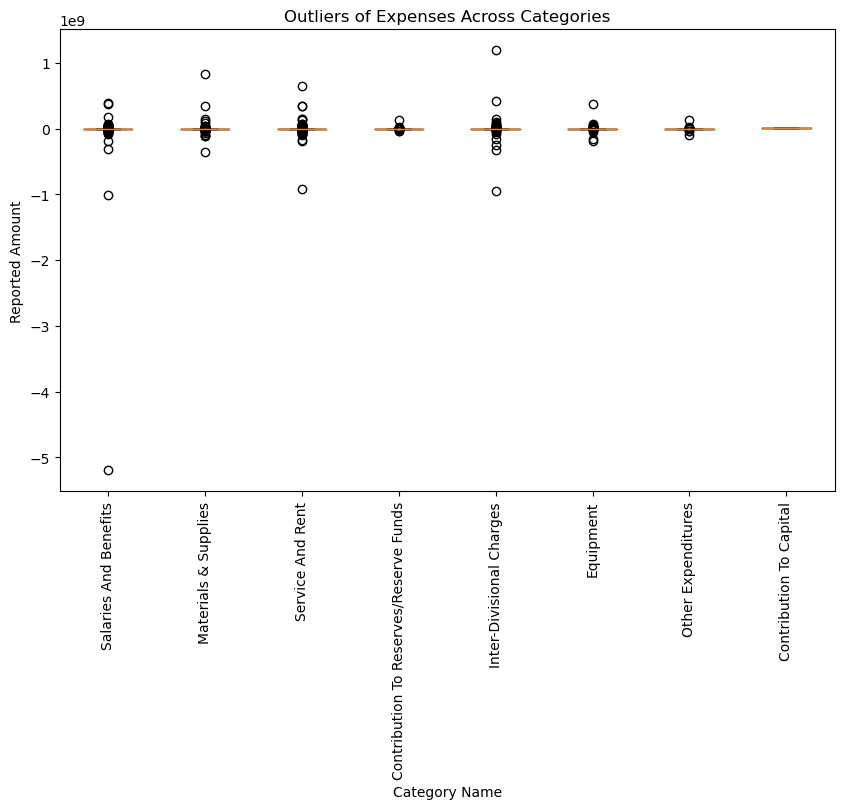

In [9]:
plt.figure(figsize=(10, 6))  #Setting the figure size
# Creating a box plot
plt.boxplot([all_outliers_exp[all_outliers_exp['Category Name'] == category]['Budgeted amount'] for category in all_outliers_exp['Category Name'].unique()])
plt.title('Outliers of Expenses Across Categories') # Setting plot title and labels
plt.xlabel('Category Name')
plt.ylabel('Reported Amount')
#Set x-axis ticks with labels for each unique category in the dataframe, rotated by 90 degrees.
plt.xticks(range(1, len(all_outliers_exp['Category Name'].unique()) + 1), all_outliers_exp['Category Name'].unique(), rotation=90)
plt.show()

#Analysis

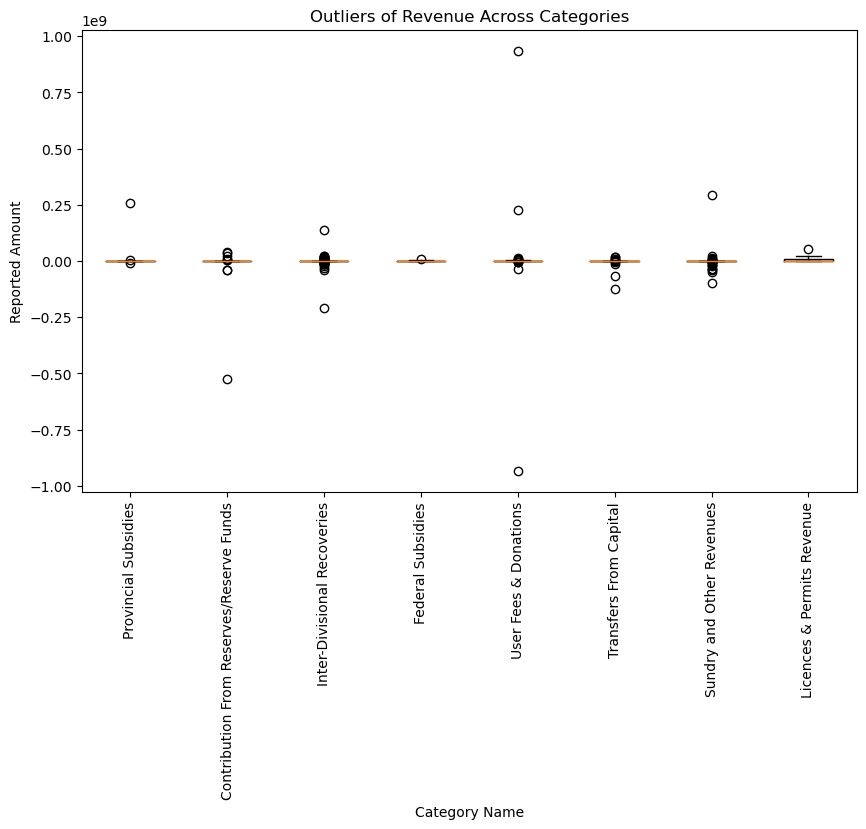

In [10]:
plt.figure(figsize=(10, 6)) #Setting the figure size
# Creating a box plot
plt.boxplot([all_outliers_rev[all_outliers_rev['Category Name'] == category_rev]['Budgeted amount'] for category_rev in all_outliers_rev['Category Name'].unique()])
plt.title('Outliers of Revenue Across Categories') # Setting plot title and labels
plt.xlabel('Category Name')
plt.ylabel('Reported Amount')
#Set x-axis ticks with labels for each unique category in the dataframe, rotated by 90 degrees.
plt.xticks(range(1, len(all_outliers_rev['Category Name'].unique()) + 1), all_outliers_rev['Category Name'].unique(), rotation=90)
plt.show()

In [11]:
renamed_expenses['Program'].unique()

array(['Affordable Housing Office', "Children's Services",
       'Court Services', 'Economic Development & Culture',
       'Long-Term Care Homes & Services', 'Parks, Forestry & Recreation',
       'Shelter, Support & Housing Administration',
       'Social Development, Finance & Administration',
       'Toronto Employment & Social Services',
       'Toronto Paramedic Services', 'City Planning',
       'Engineering & Construction Services', 'Fire Services',
       'Municipal Licensing & Standards',
       'Policy, Planning, Finance & Administration', 'Toronto Building',
       'Transportation Services', '311 Toronto',
       'Facilities, Real Estate, Environment & Energy', 'Fleet Services',
       'Information & Technology',
       'Office of the Chief Financial Officer',
       'Office of the Controller', "City Manager's Office",
       "City Clerk's Office", 'City Council', 'Legal Services',
       "Mayor's Office", "Auditor General's Office",
       "Integrity Commissioner's Office

In [13]:
sum_by_program = renamed_expenses.groupby('Program')['Budgeted amount'].sum()
program_expenditure_df = pd.DataFrame(sum_by_program)
program_expenditure_df.sort_values('Budgeted amount', ascending=False)

,Budgeted amount
Program,
Solid Waste Management Services,1.859081e+09
Children's Services,1.822158e+09
"Social Development, Finance & Administration",8.383530e+08
"Shelter, Support & Housing Administration",4.889003e+08
Fleet Services,3.839016e+08
...,...
Non-Program Expenditures,-1.987324e+08
City Clerk's Office,-3.175388e+08
Toronto Employment & Social Services,-3.427091e+08


In [14]:
s_array = program_expenditure_df['Budgeted amount'].to_numpy()
sorted_array = np.sort(s_array)
print(sorted_array)

[-6.34911939e+09 -1.28445395e+09 -3.42709095e+08 -3.17538778e+08
 -1.98732437e+08 -7.95396710e+07 -5.08752524e+07 -3.24876014e+07
 -1.81256100e+07 -5.44489851e+06  0.00000000e+00  0.00000000e+00
  0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
  0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
  0.00000000e+00  0.00000000e+00  2.76797290e+05  3.84281510e+05
  4.99626910e+05  5.15329170e+05  5.75000000e+05  1.38713652e+06
  1.86659637e+06  2.28422868e+06  2.79795980e+06  3.32344518e+06
  3.84446072e+06  3.92026144e+06  4.70195084e+06  6.12014835e+06
  7.42540680e+06  7.57585880e+06  1.93273981e+07  2.00946394e+07
  2.16601215e+07  2.28474760e+07  2.49507724e+07  2.76266255e+07
  3.02624419e+07  3.26328881e+07  3.34356782e+07  4.13871180e+07
  4.35830290e+07  5.19351897e+07  5.22953555e+07  5.97093311e+07
  7.28024255e+07  8.52401698e+07  8.60932114e+07  1.82800674e+08
  2.06474270e+08  2.13296255e+08  2.47158248e+08  3.00281151e+08
  3.59742499e+08  3.83901